In [373]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
import math as math
%matplotlib inline

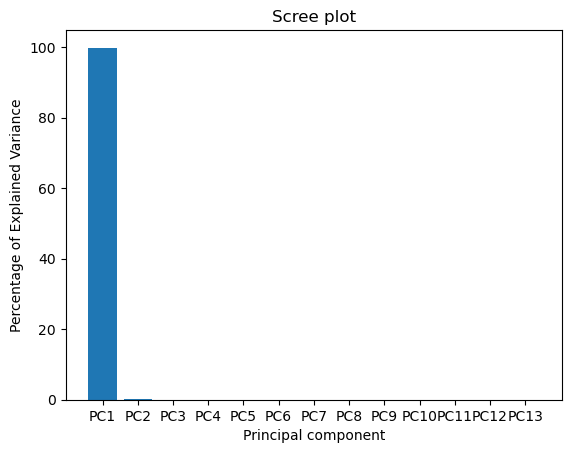

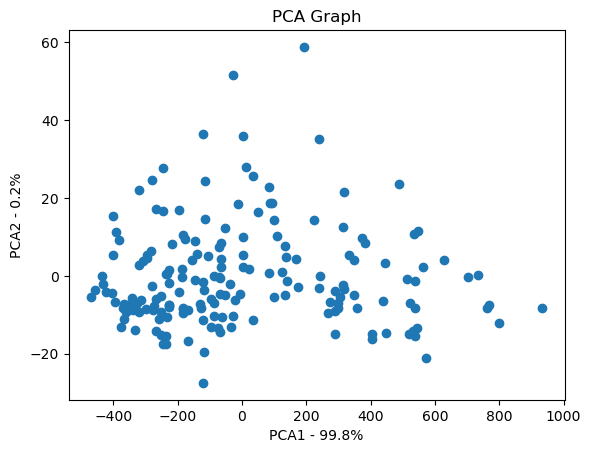

<class 'list'>


In [374]:
#Import, scale, perform PCA and plot data
colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

data = pd.read_csv('WINE.txt', names=colnames, usecols=['2','3','4','5','6','7','8','9','10','11','12','13','14'], delimiter=r"\s+")
#data.iloc[1:].values
data.head()

#scaled_data = preprocessing.scale(data)

#------------------------------------------------------------------------------------------------- Creates PCA object and performs the pca calculations ----------------------------------------------------------------------------------------
pca = PCA()
#pca.fit_transform!!!!
pca.fit(data)
pca_data = pca.transform(data)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]


#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the SCREE graph -----------------------------------------------------------------
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the PCA graph -----------------------------------------------------------------
pca_data = pd.DataFrame(pca_data, index = range(1,len(data)+1), columns = labels)
plt.scatter(pca_data.PC1, pca_data.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))
plt.show()
print(list)

In [375]:
#--------------------------K-means clustering from here--------------------------

#Help functions 


def random_centers(dim, k, len_data):
    centers = []

    for i in range(k):
        center_coordinates = []
        for j in range(dim):
            rand_num = random.uniform(-4,4)
            center_coordinates.append(rand_num) 
        centers.append(center_coordinates)

    return centers

#returns the centroid with the least euclidean distance to data_point
def smallest_centroid_distance(data_point, centers, dims):

    smallest_euc_dist = math.inf
    vector_diff = 0
    #print(data_point.iloc[0:1,0:dims+1])

    
    print("DATA POINT")
    print(data_point)
    print("---------------------------------------")

    for index in range(0, len(centers)):
        
        sum_square = 0
        vector_diff = pca_data.astype(float).iloc[0:1,0:dims] - centers[index]
        print("Vector diff: " + str(vector_diff))
        for i in range(0, dims):
            sum_square += vector_diff.iloc[0,i]**2 
        print("Sum square " + str(sum_square))
        euclidean_distance = np.sqrt(sum_square)
        print("Euclidean distance " + str(euclidean_distance))
        if euclidean_distance<smallest_euc_dist:
            smallest_index = index
            smallest_euc_dist = euclidean_distance 
        print()
        
    print("smallest index: " + str(smallest_index))        
    return smallest_euc_dist, smallest_index


# ! Append each point of the dataset to a list. Later on we will update the centroids using the mean of each index from each list 
def point_clustering(data, centers, dims, centroids, num_dims):   
    
    #print(pca_data)
    print("test")
    print(data)
    print("test")
    print(str(len(data)))
    zero_list = []
    one_list = []
    two_list = []
    for point in range(0,len(data)):#pca_data)

        print(centroids)

        distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims], centroids, num_dims)
        
        if index == 0:
            zero_list.append(data[point])
        elif index == 1:
            one_list.append(data[point])
        elif index ==2:
            two_list.append(data[point])

    print("len: " + str(len(zero_list)))
    print("len2: " + str(len(two_list)))
    print("len1: " + str(len(one_list)))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    zero_list = pd.DataFrame(zero_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(zero_list.PC1, zero_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    one_list = pd.DataFrame(one_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(one_list.PC1, one_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
    two_list = pd.DataFrame(two_list, index = range(1,len(data)+1), columns = labels)
    plt.scatter(two_list.PC1, two_list.PC2)
    plt.title('PCA Graph')
    plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
    plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

    plt.show()
    
    #print(zero_list.head())
    #print(list)

    
    return zero_list, one_list, two_list

def mean_center(data, center, dims):
    return new_centers




            PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
1    318.562979  21.492131  3.130735 -0.250114  0.677078  0.568081 -0.619642   
2    303.097420  -5.364718  6.822835 -0.864035 -0.486096  0.014340  0.108865   
3    438.061133  -6.537309 -1.113223  0.912411  0.380651  0.672404  0.785819   
4    733.240139   0.192729 -0.917257 -0.541251  0.858662  0.599122  0.018770   
5    -11.571428  18.489995 -0.554422  1.360896  0.276442  0.768884 -0.309976   
..          ...        ...       ...       ...       ...       ...       ...   
174   -6.980211  -4.541137 -2.474707 -3.155920 -2.348927  1.439001 -0.026425   
175    3.131605   2.335191 -4.309931 -1.562181 -1.168003  0.128679  0.003859   
176   88.458074  18.776285 -2.237577 -4.820708 -1.057336  0.215000  0.648489   
177   93.456242  18.670819 -1.788392 -3.709352 -0.276956 -1.009229  0.414948   
178 -186.943190  -0.213331 -5.630510 -3.472987  0.007035  0.703636 -0.693761   

          PC8       PC9      PC10      

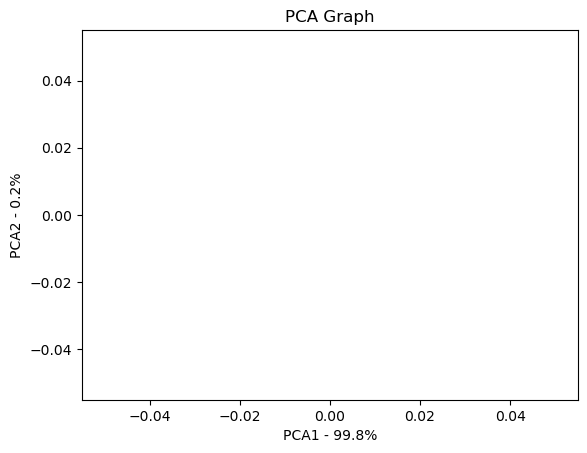

In [376]:
num_dims = 3
num_centroids = 3
centroids = random_centers(num_dims, num_centroids, len(pca_data))
zero_list = []
one_list = []
two_list = []

print(pca_data)
print()
print(pca_data.astype(float).iloc[0,0:num_dims])
print(pca_data.astype(float).iloc[1,0:num_dims].T)
print(len(pca_data))
for point in range(0, len(pca_data)):
    distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims].T, centroids, num_dims)
    
    print(index)
    print("point" + str(point))
    """if index == 0:
        zero_list.append(data[point])
    elif index == 1:
        one_list.append(data[point])
    elif index ==2:
        two_list.append(data[point])"""
    print("-------------------------------")

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
zero_list = pd.DataFrame(zero_list, index = range(1,len(data)+1), columns = labels)
plt.scatter(zero_list.PC1, zero_list.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
one_list = pd.DataFrame(one_list, index = range(1,len(data)+1), columns = labels)
plt.scatter(one_list.PC1, one_list.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
two_list = pd.DataFrame(two_list, index = range(1,len(data)+1), columns = labels)
plt.scatter(two_list.PC1, two_list.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))

plt.show()

    

#point_clustering(pca_data.astype(float).iloc[:,:].values, num_centroids, num_dims, centroids, num_dims)
